## Load Library & Dataset

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import Dataset
retail = pd.read_csv('customer_shopping_data.csv')

retail.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## Data Overview

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


## Convert Type Data

In [4]:
retail['invoice_date'] = pd.to_datetime(retail['invoice_date'])
retail.dtypes

C:\Users\USER\AppData\Local\Temp\ipykernel_26488\2642017306.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  retail['invoice_date'] = pd.to_datetime(retail['invoice_date'])


invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

In [5]:
retail.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


## Duplicated Value

In [6]:
retail.duplicated().sum()

0

## Missing Value

In [7]:
retail.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

## Exploratory Data Analysis

## Statictic Summary

In [8]:
retail.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## Univariate Analysis - Numerical Variable

In [9]:
# Numerical datatypes
retail.select_dtypes(include=['int64','float64','Int64']).dtypes

age           int64
quantity      int64
price       float64
dtype: object

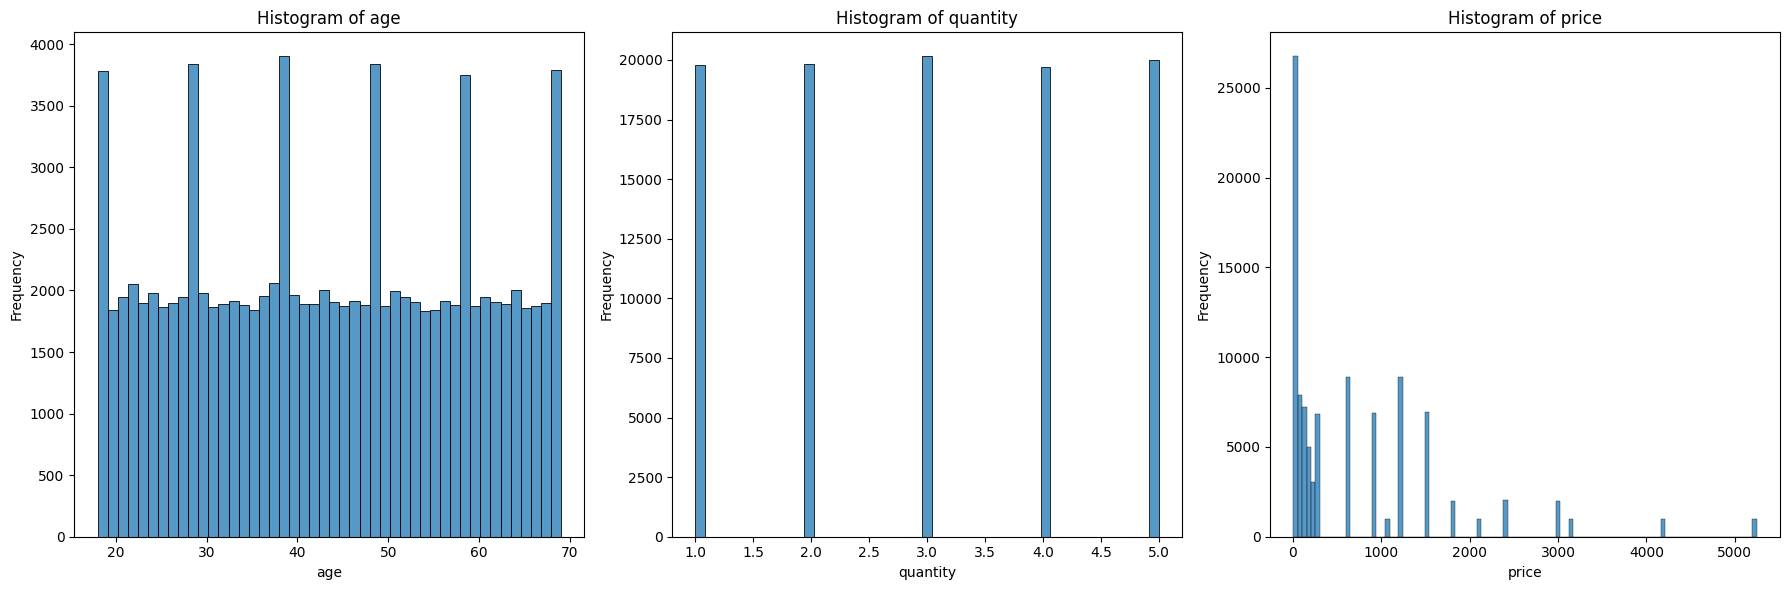

In [10]:
# Mendefinisikan kolom untuk diplot
columns = ['age', 'quantity', 'price']

# Membuat figure dan axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 baris, 3 kolom

# Menggunakan loop untuk membuat histogram untuk setiap kolom
for i, col in enumerate(columns):
    sns.histplot(data=retail, x=col, ax=axs[i])
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()


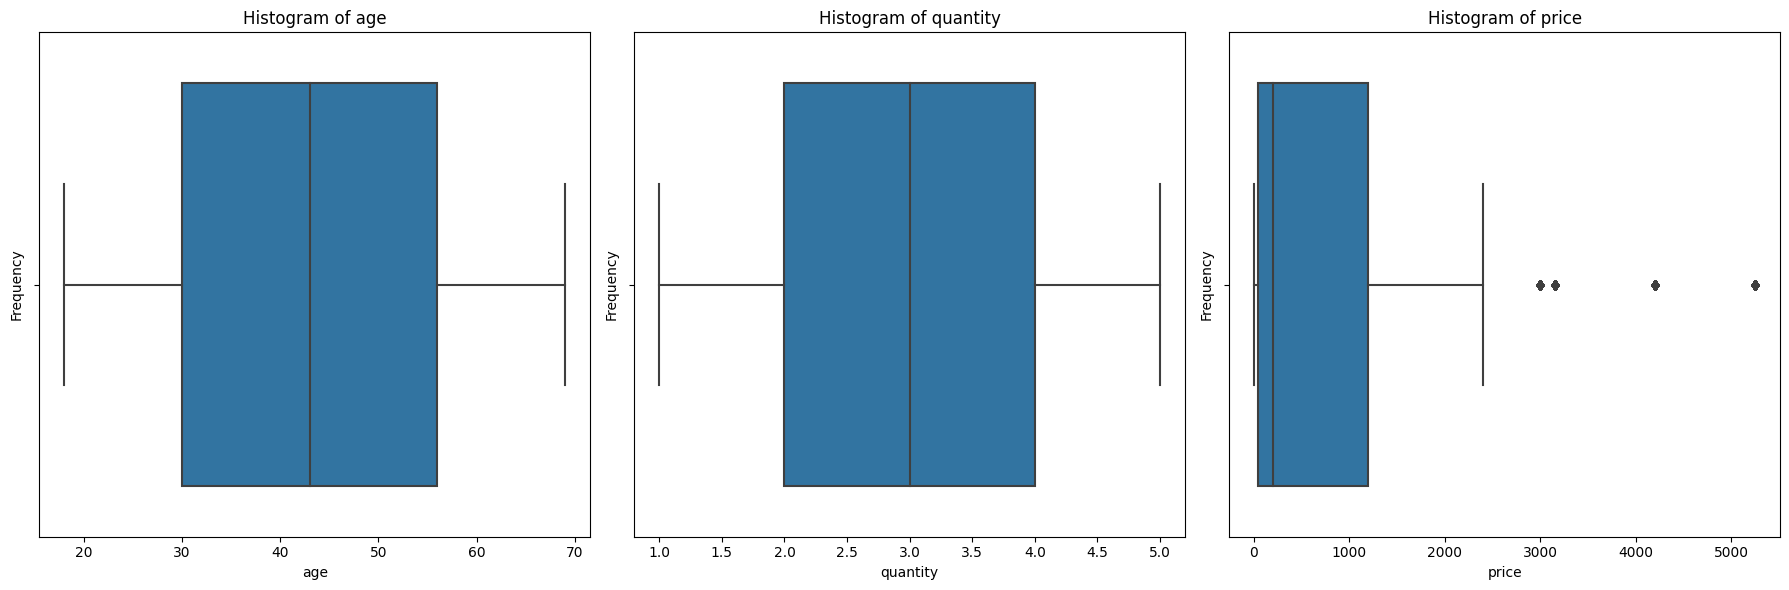

In [11]:
# Mendefinisikan kolom untuk diplot
columns = ['age', 'quantity', 'price']

# Membuat figure dan axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 baris, 3 kolom

# Menggunakan loop untuk membuat histogram untuk setiap kolom
for i, col in enumerate(columns):
    sns.boxplot(data=retail, x=col, ax=axs[i])
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()


## Univariate Analysis - Categorical Variable

In [12]:
# Categorical datatypes
retail.select_dtypes(exclude=['int64','float64','Int64']).dtypes

invoice_no                object
customer_id               object
gender                    object
category                  object
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

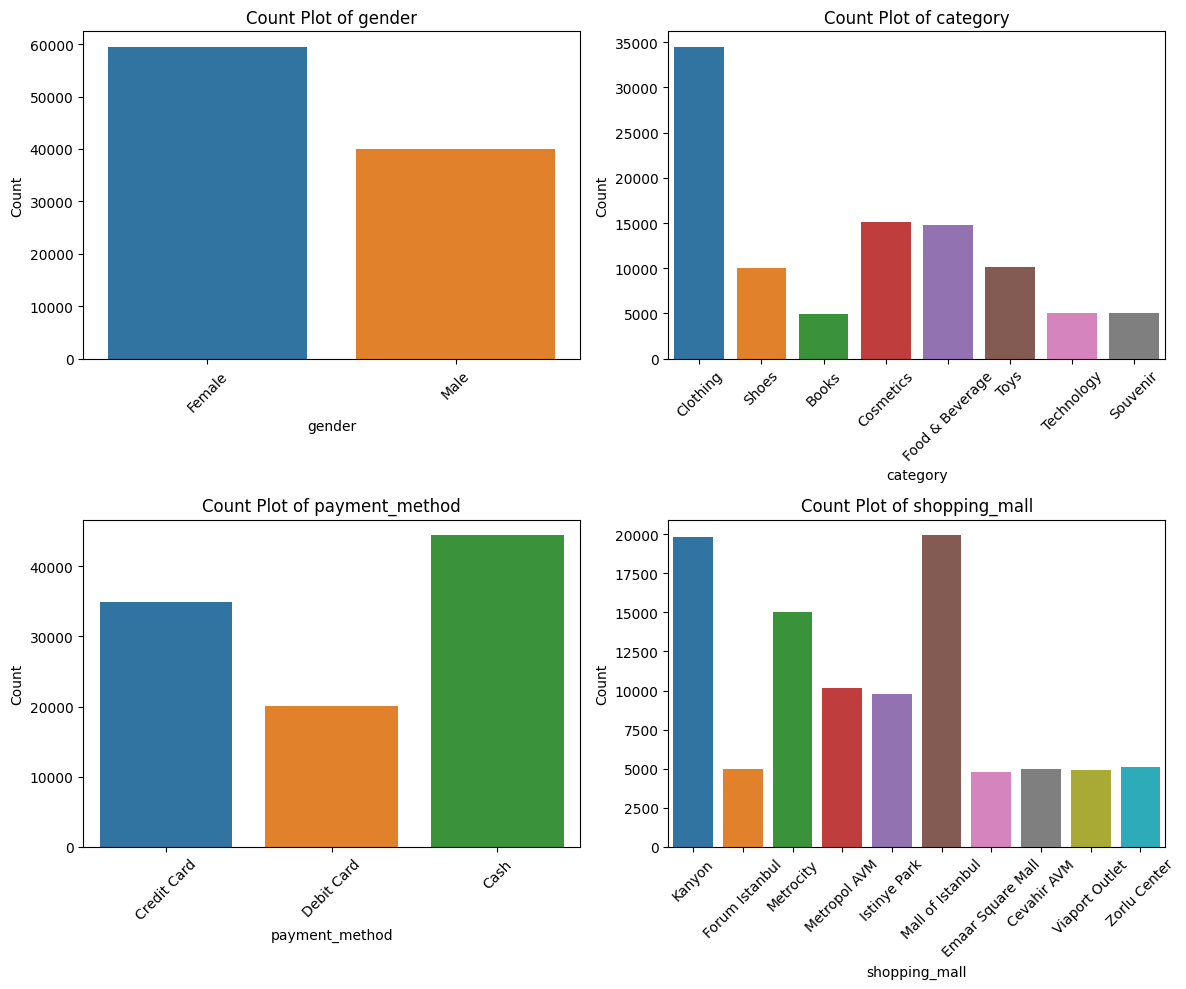

In [14]:
# Mendefinisikan kolom untuk diplot
columns = ['gender', 'category', 'payment_method', 'shopping_mall']

# Membuat figure dan axes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 baris, 2 kolom

# Menggunakan loop untuk membuat count plot untuk setiap kolom
for i, col in enumerate(columns):
    sns.countplot(data=retail, x=col, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Count Plot of {col}')
    axs[i//2, i%2].set_xlabel(col)
    axs[i//2, i%2].set_ylabel('Count')
    axs[i//2, i%2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()
